# **HR Analytics Job Prediction**

### Understand the business scenario and problem

This dataset contains information about employees who worked in a company. The following question is that what's likely to make the employee leave the company. Since it is time-consuming and expensive to find, interview, and hire new employees, inceasing employee retention will be beneficial to the company, by predicting employees that are likely to quit and identifying factors that contribute to their leaving. The aim of this project is thus to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

The dataset has the following variable columns and description of what each variable means.

For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### Load dataset

In [2]:
df0 = pd.read_csv("HR_comma_sep.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Initial Data Exploration

We do a initial data exploration of the dataset to understand more about the dataset we are using. We can learn more about the dataset but finding out the dtypes of the columns, the destributions of the column variables.

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [5]:
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

There is a need to rename the columns to standardized them. Some of the columns have the first letter capitalized when the others do not. Time_spend company is also renamed to tenure to be more concise. 

In [6]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

In [7]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [8]:
df0.duplicated().sum()

3008

In [9]:
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


### Drop duplicates and save resulting dataframe 

In [10]:
df0=df0.drop_duplicates(keep="first")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Use 'tenure' to check for outliers since we want to find out are there outliers ie who have stayed in the company for a very long time.

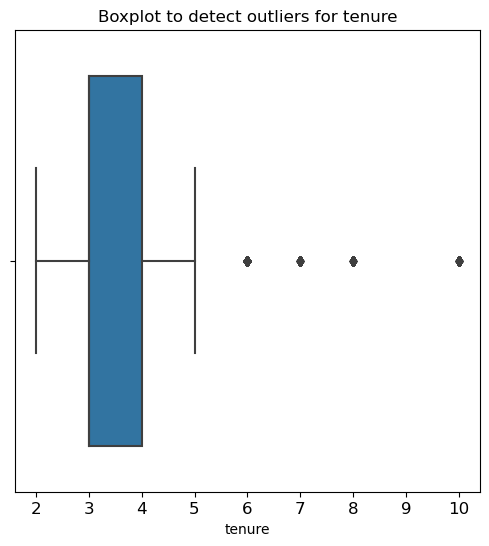

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df0['tenure'])
plt.show()

Using 1.5 * IQR to define the upper and lower limit, then find out how many outliers there are for 'tenure' 

In [12]:
# Determine the number of rows containing outliers
percentile25 = df0['tenure'].quantile(0.25)
percentile75 = df0['tenure'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75 + (1.5*iqr)
lower_limit=percentile25 - (1.5*iqr)
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

print(len(df0[(df0['tenure']> upper_limit) | (df0['tenure']< lower_limit) ]))

Lower limit: 1.5
Upper limit: 5.5
824


There are 824 outliers for 'tenure'. While the number of outliers is small compared to the length of the entire dateset, this may still be significant as certain types of models are more sensitive to outliers than others. This will affect the types of model that will be build. 

## Comprehensive Data Exploration 

To start off, we can find out how many employees have left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df0['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df0['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, there would be a need to resample the data to make it more balanced. However, in this case, we can use this data without modifying the class balance.

### Data visualizations

Some of the common factors as to why an employee would leave a company could be overworked, no promotions despite a long tenure, lower salary compared to what was expected, or low satisfaction in the job. Outside of 'accident', this coincide with the other variable columns of the dataset. Hence, we can examine these variables and create plots o visualize relationships between variables in the data.

We first plot graphs to examine the relationship between 'number_project', 'average_monthly_hours' for those who left and stayed.

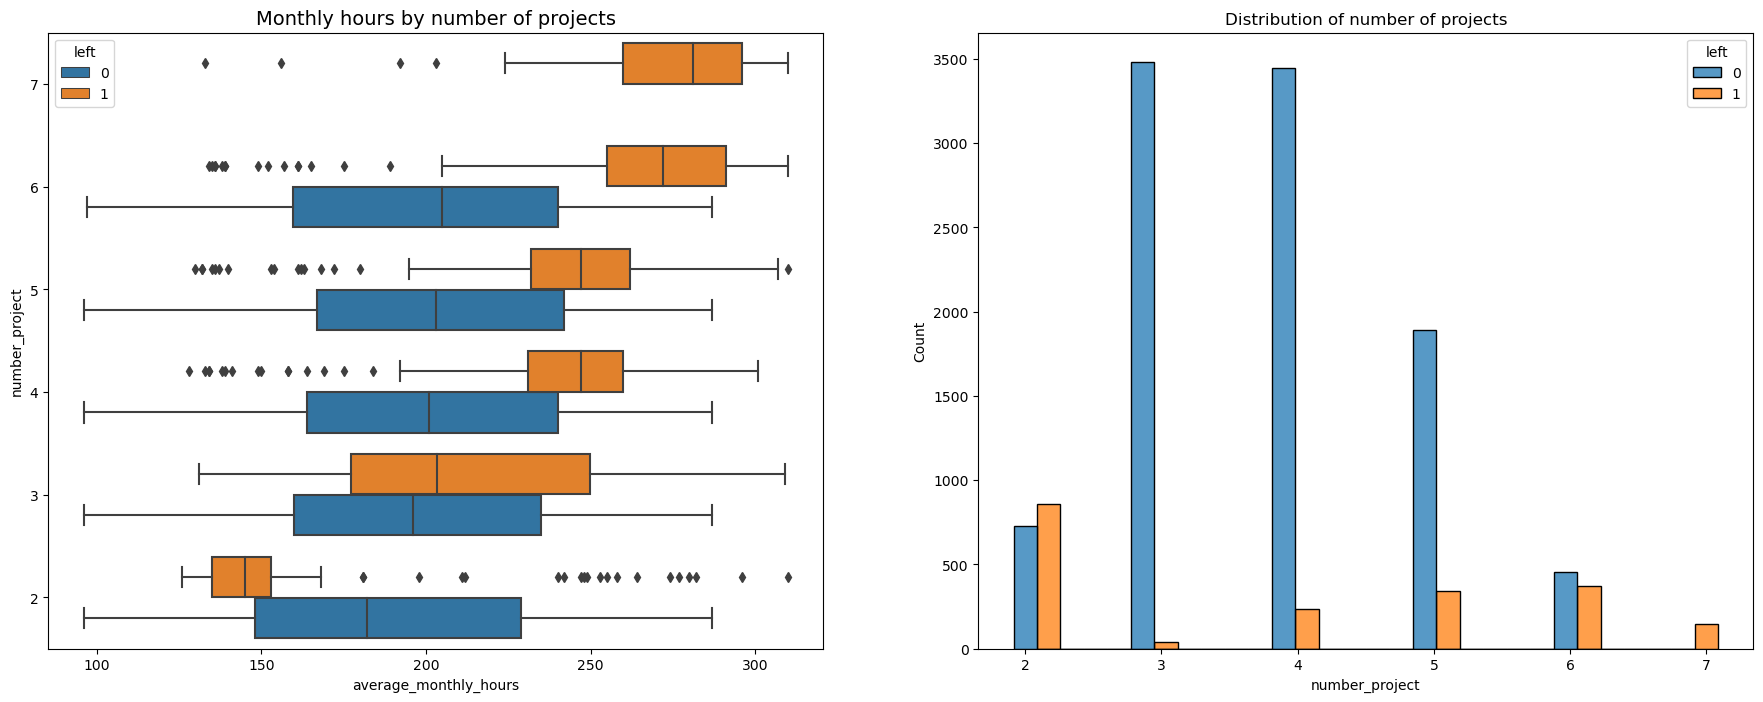

In [14]:

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df0, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')


sns.histplot(data=df0, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title("Distribution of number of projects")

plt.show()

### Insights

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

From the first plot, there are two groups of employees who left the company: (A) those who worked considerably less than their peers when given 2 projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

From the second plot, everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group.The optimal number of projects for employees to work on seems to be 3–4 as the ratio of left/stayed is very small for these cohorts.

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.


In [15]:
#check those that have 7 projects all left.
df0[df0['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

We then plot a scatterplot to examine the distribution of data for 'satisfaction_level' and 'average_monthly_hours' for those who left and stayed.

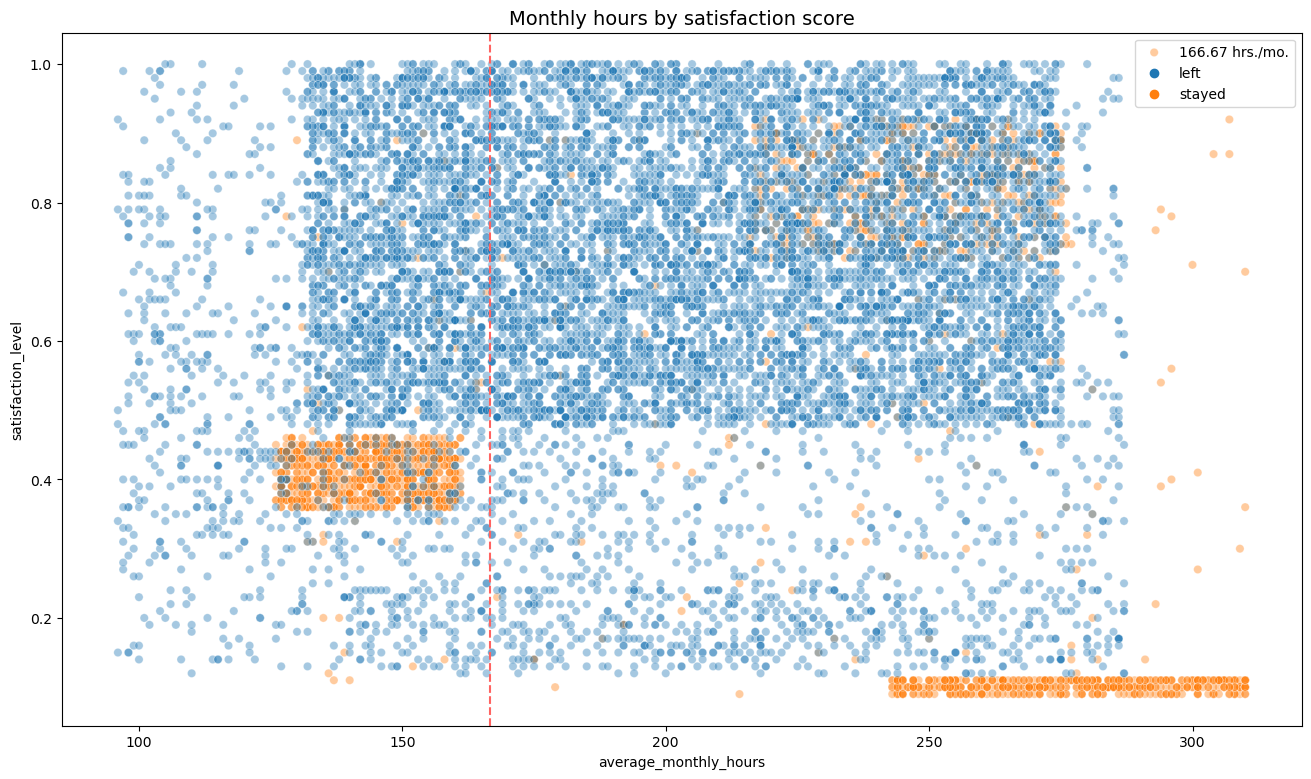

In [16]:
# Set figure
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df0, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction score', fontsize='14');

### Insights

The scatterplot above shows 3 differnt groups of employees who left.

Firstly, there is a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero due to being extremely overworked.

Secondly, there is another group who worked ~130-160 hours per month, lesser than the 40 hours work week. Even so, their satisfaction was only around 0.4. It could be that they left as they felt that they were not given their fair share of opportunity to contribute, hence the lowered satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

There might be indicative of data manipulation or synthetic data due to the strange shape of distributions.

We then plot graphs to examine the relationship between 'satisfaction_level', 'tenure' for those who left and stayed.

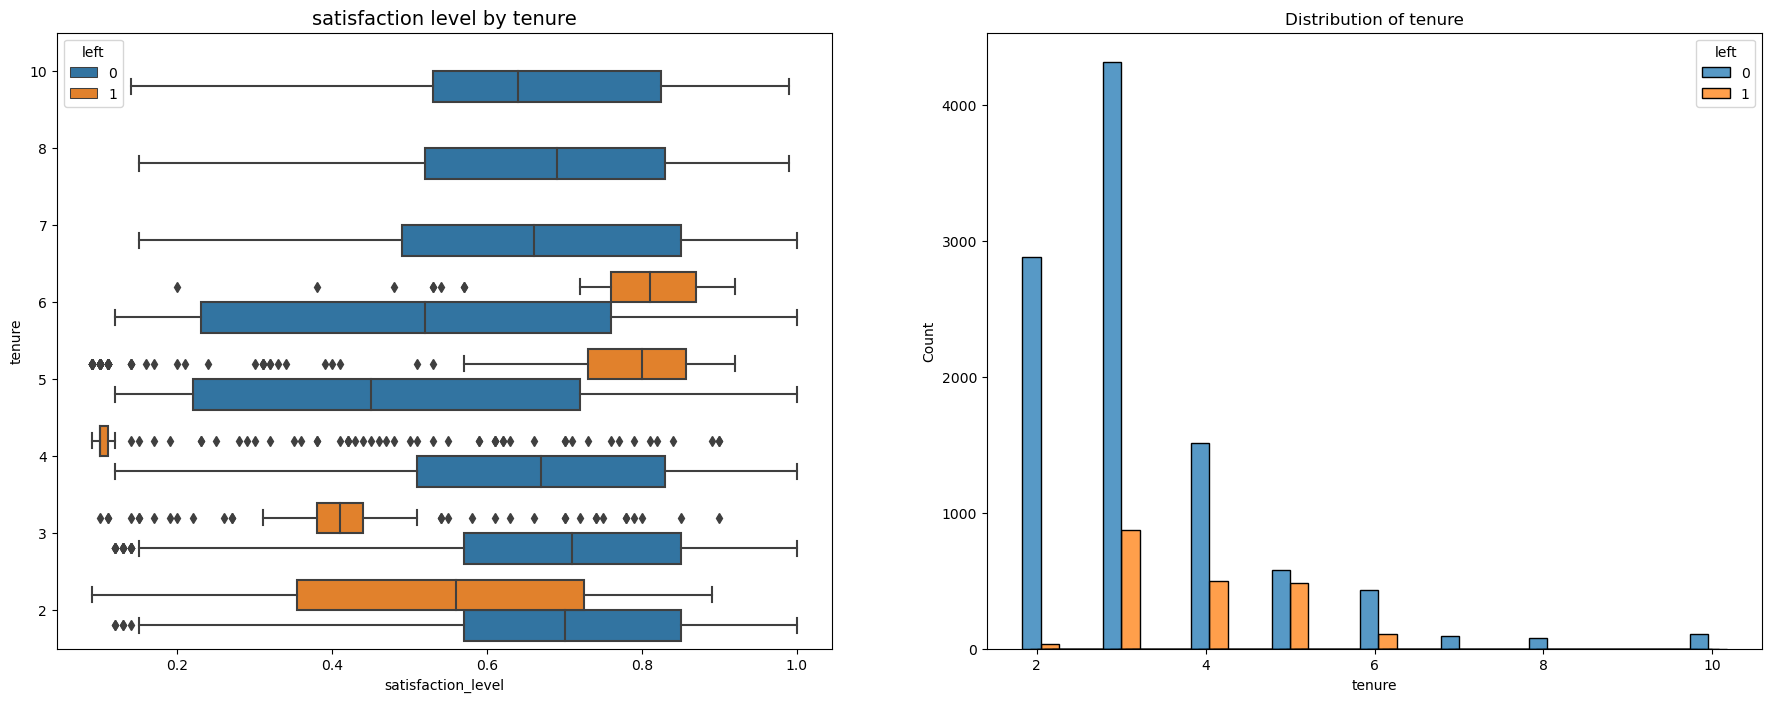

In [17]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(data=df0, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('satisfaction level by tenure', fontsize='14')

sns.histplot(data=df0, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title("Distribution of tenure")

plt.show()

### Insights

Employees who left fall into two general categories from the first plot: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

For the three and four years employees who left, majority of them have low satisfaction level of lower than satisfcation level of 0.5. The four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.

For the five and six years employee who left, majority of them have high satisfaction level. It could be possible that they left on a good note for other opportunities after working at the company for long years.

Another thing to note is that the longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.


Plot a scatterplot to find out more about the distribution of satisfaction by tenure of those who left and stayed.

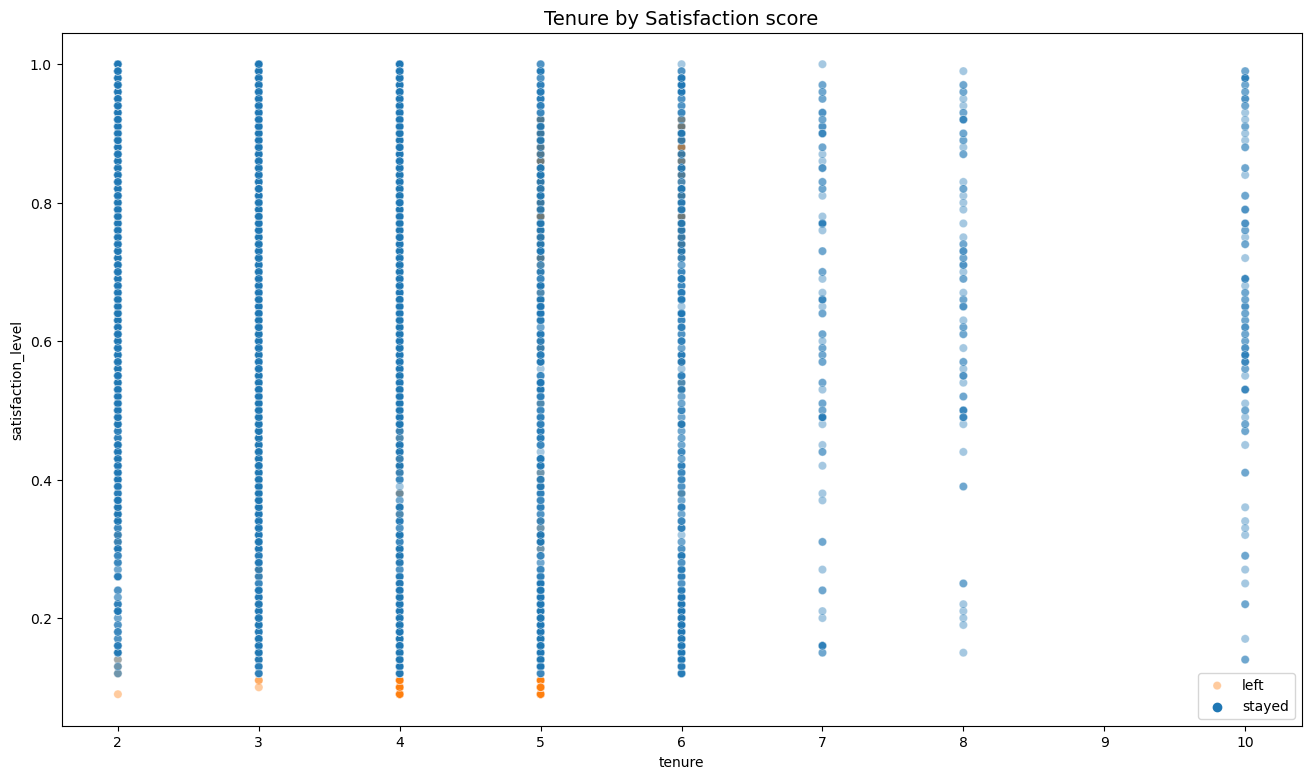

In [18]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df0, x='tenure', y='satisfaction_level', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'])
plt.title('Tenure by Satisfaction score', fontsize='14');

To understand more about the relationship between satisfaction score and leaveing, we can finding the mean and median satisfaction scores of employees who left and stayed.

In [19]:
df0.groupby('left')[['satisfaction_level']].agg(['mean', 'median'])

satisfaction_level       
                   mean median
left                          
0              0.667365   0.69
1              0.440271   0.41

### Insights

This make sense as those who left should have lower satisfaction scores compared to those who have stayed.  Interestingly,for those who stayed, the mean satisfaction score is slightly below the median score. This indicates that satisfaction levels for those who stayed might be skewed to the left.

We then examine the relationship between 'salary', 'tenure' for those who left and stayed.. 'tenure' is split into short and long tenure as there would be a difference between them contextually.

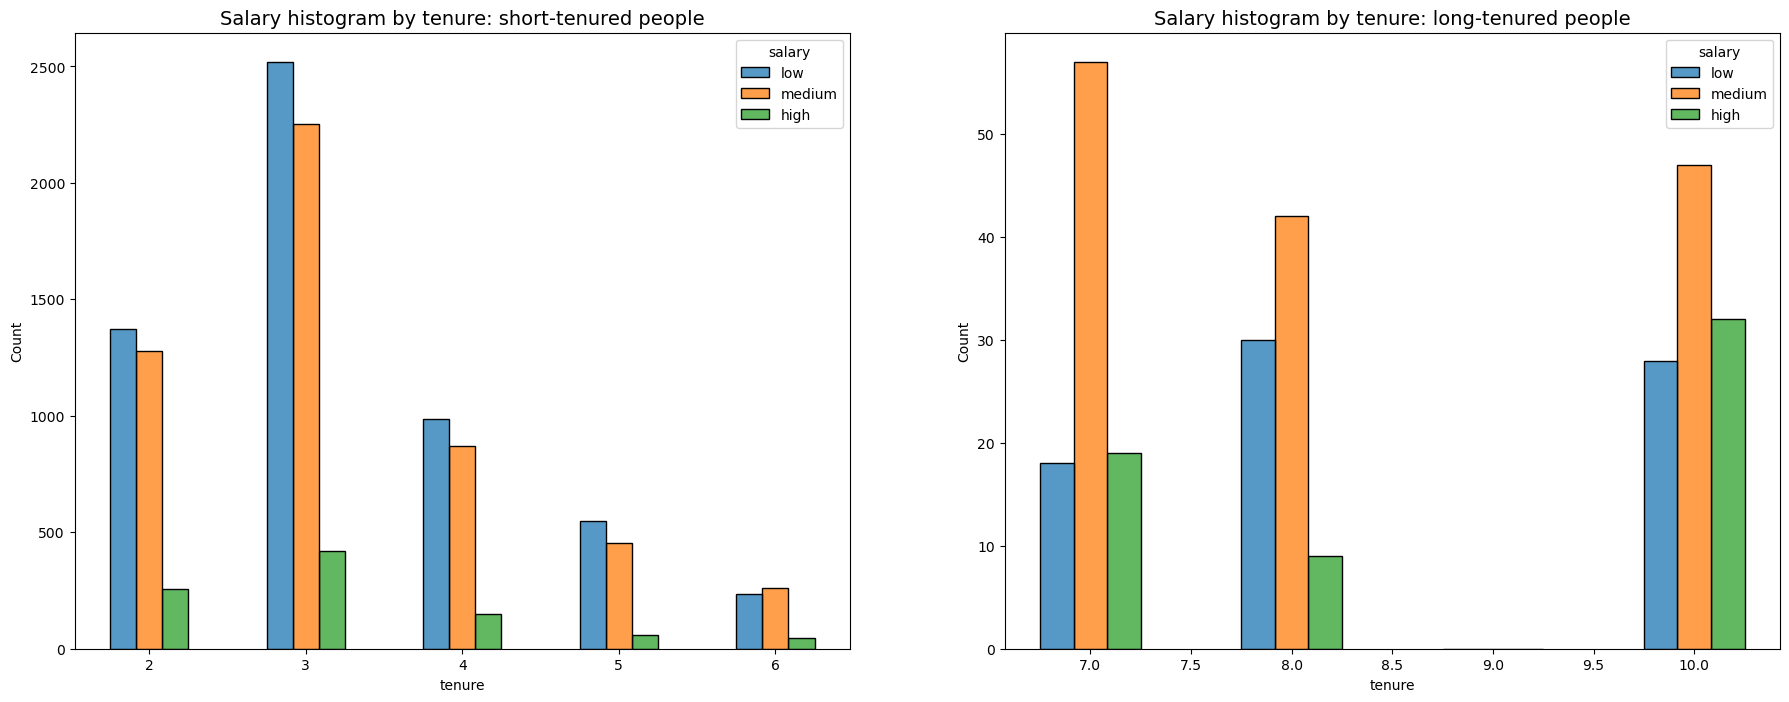

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df0[df0['tenure'] < 7]

# Define long-tenured employees
tenure_long = df0[df0['tenure'] > 6]

sns.histplot(data=tenure_short, x='tenure', discrete=1,  hue='salary', hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

sns.histplot(data=tenure_long, x='tenure', discrete=1,  hue='salary', hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=0.5, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

plt.show()

### Insights

The plots show that long-tenured employees were not disproportionately comprised of higher-paid employees.

We then plot a scatterplot to find out more about the distribution of evaluation score based on monthly hours for those who left and stayed.

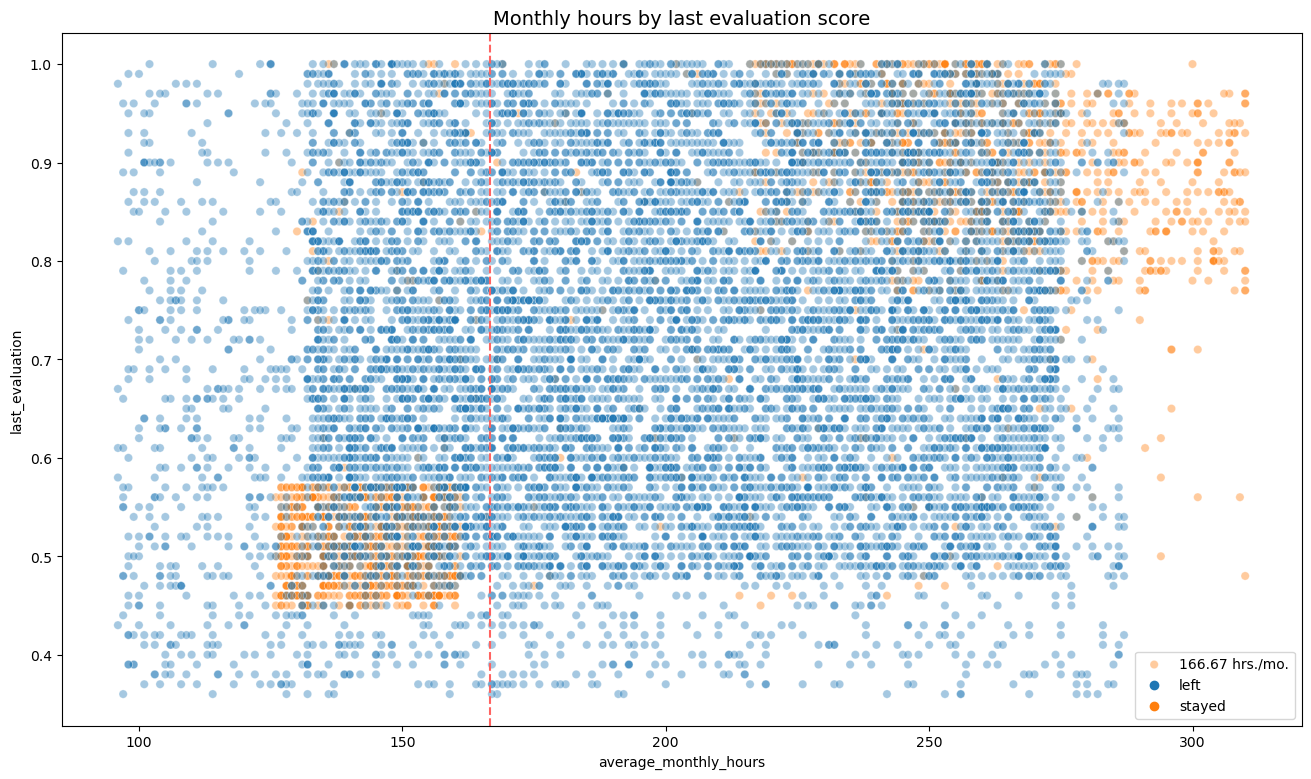

In [21]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df0, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

### Insights

The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly lesser than 40 hours per week with lower evaluation scores.

There seems to be a correlation between hours worked and evaluation score.

Most of the employees in this company work well over 167 hours per month.

Next, we plot a scatterplot to find out the distribution of 'promotion_last_5years' and 'average_monthly_hours' for those who left and stayed.

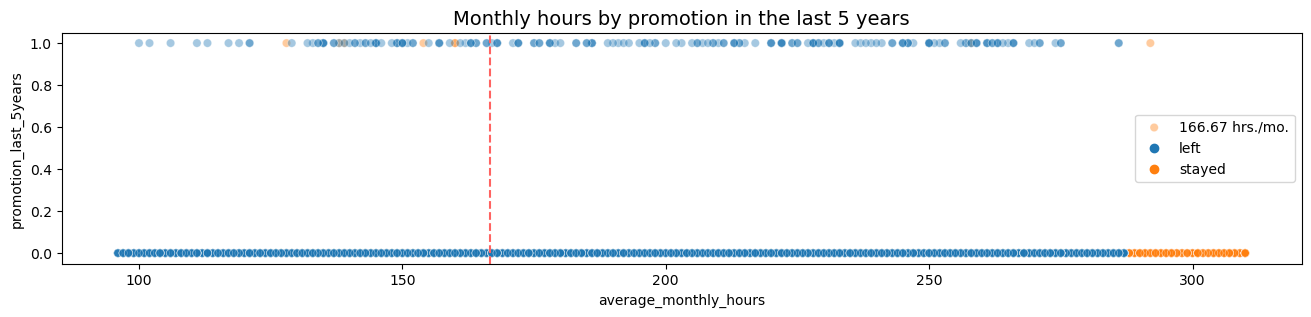

In [22]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df0, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion in the last 5 years', fontsize='14');

### Insights

The scatterplot shows that very few employees who were promoted in the last five years left. However, very few employees who worked the most hours were promoted and almost all of the employees who left were working the longest hours

Lastly, we find out if 'department' plays a part in deciding if employees leave or stay.

In [23]:
df0["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of those who left/stayed by departments')

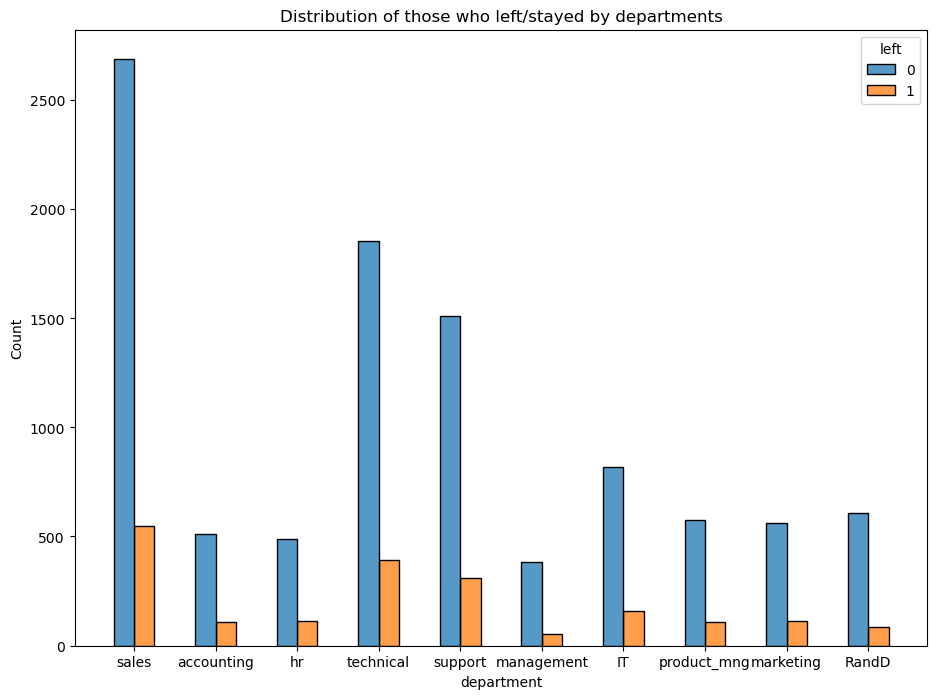

In [24]:
plt.figure(figsize=(11,8))
sns.histplot(data=df0, x='department', hue='left', multiple='dodge', shrink=0.5)
plt.title("Distribution of those who left/stayed by departments")

### Insights

There does not seem to have any department that differs significantly in its proportion of employees who left to those who stayed.

## Model Building

Before we build the model, we need to find out the correlations between the predictor variables.

In [25]:
df0

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


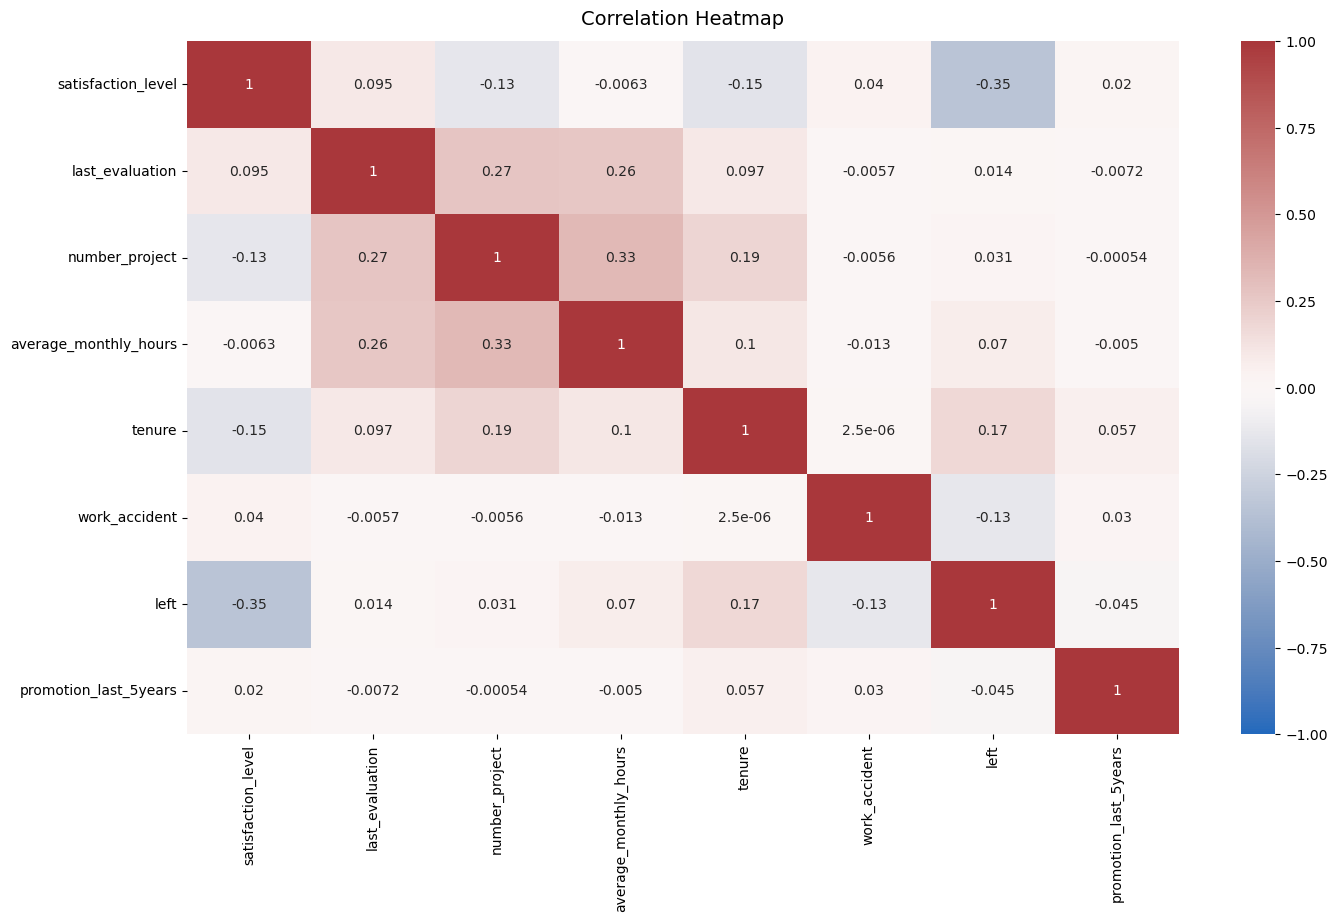

In [26]:
numeric_df = df0.select_dtypes(include=['number'])

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

##  Model Building

### Type of prediction task.

Binary Classification task. The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. 'left' can be either 1 (indicating employee left) and 0 (indicating employee stayed).

### Type of model most appropriate for this task.

Since we are doing binary classification, we can do logistic regression, tree-based model such as decision tree and random forest, and XGBoost.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [27]:
# Copy the dataframe
df_enc = df0.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, columns=['department'], drop_first=False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


## Logistic Regression

For logistic regression, we need to check for model assumptions. These are the assumptions:

- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Hence, a heatmap is created to visualize how correlated variables are. 

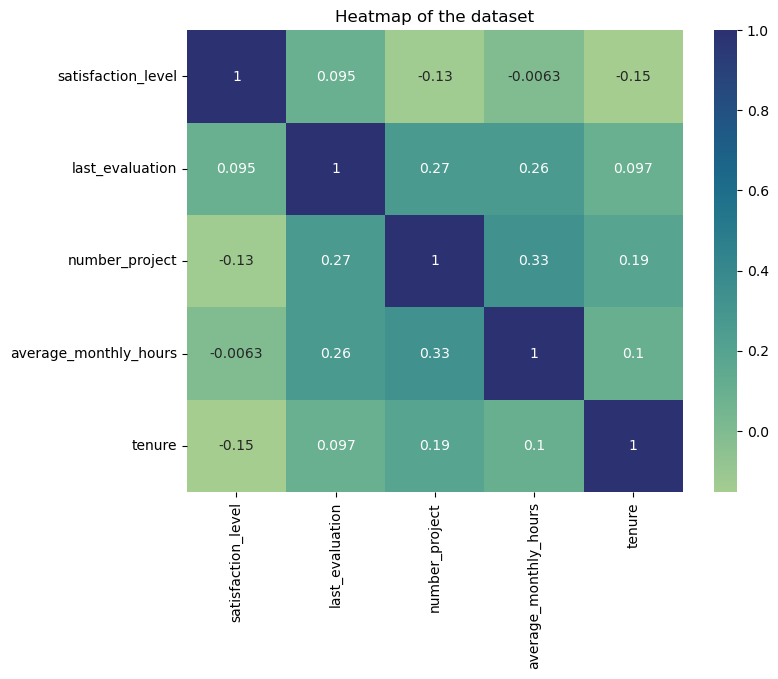

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Since logistic regression is quite sensitive to outliers, we should remove the outliers in the tenure column that were identified earlier.

In [29]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [30]:
y = df_logreg['left']
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [31]:
X = df_logreg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [74]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [75]:
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model.

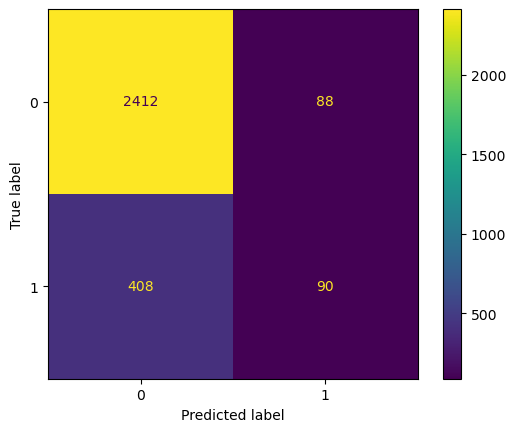

In [76]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)
log_disp.plot(values_format='')

plt.show()

- The upper-left quadrant displays the number of true negatives.
- The upper-right quadrant displays the number of false positives.
- The bottom-left quadrant displays the number of false negatives.
- The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

In [77]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.96      0.91      2500
    Predicted would leave       0.51      0.18      0.27       498

                 accuracy                           0.83      2998
                macro avg       0.68      0.57      0.59      2998
             weighted avg       0.80      0.83      0.80      2998



Convert the result into a dataframe to store

In [83]:
y_proba = log_clf.predict_proba(X_test)[:, 1]
# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

model_name = "Logistic Regression"
log_test_scores = pd.DataFrame({
    'model': [model_name],
    'precision': [report_dict['weighted avg']['precision']],
    'recall': [report_dict['weighted avg']['recall']],
    'f1': [report_dict['weighted avg']['f1-score']],
    'accuracy': [accuracy],
    'AUC': [auc]
})
log_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Logistic Regression,0.79723,0.834556,0.800374,0.834556,0.83055


## Decision Tree

In [37]:
y= df_enc['left']
X=df_enc.drop(columns=['left'], axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






GridSearchCV is used to optimize the hyperparameters of the model and AUC is used as the metric to evaluate the performance of the model. F1 scores are generally used for multiclass classification, on the other hand, AUC performs best for binary classification. Hence, AUC is used.

In [41]:
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [42]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 3.3 s
Wall time: 3.4 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [43]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [44]:
tree1.best_score_

0.9758952535925409

In [45]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [46]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [47]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.966878,0.918288,0.941941,0.981208,0.975895


In [72]:
tree1_cv_test_scores = get_scores('decision tree cv', tree1, X_test, y_test)
tree1_cv_test_scores

,model,precision,recall,f1,accuracy,AUC
0,decision tree cv,0.97463,0.925703,0.949537,0.983656,0.960451


## Random Forest

In [50]:
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

rf_cv=GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit= 'roc_auc')

In [51]:
%%time

rf_cv.fit(X_train, y_train)

CPU times: total: 28min 31s
Wall time: 28min 32s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [52]:
# Check best AUC score on CV
rf_cv.best_score_

0.9807673131168023

In [53]:
# Check best params
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [54]:
rf_cv_results = make_results('random forest cv', rf_cv, 'auc')
rf_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.948082,0.916938,0.932229,0.977872,0.980767


In [91]:
rf_cv_test_scores = get_scores('random forest cv', rf_cv, X_test, y_test)
rf_cv_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest cv,0.954262,0.921687,0.937692,0.979653,0.956443


## XGBoost

In [65]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

xgb_cv=GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit= 'roc_auc')

In [66]:
%%time

xgb_cv.fit(X_train, y_train)

D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

CPU times: total: 1min 29s
Wall time: 7.85 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [67]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 15,
 'subsample': 0.7}

In [69]:
xgb_cv.best_score_

0.9816928299402182

In [70]:
xgb_cv_results = make_results('random forest cv', xgb_cv, 'auc')
xgb_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.967212,0.906893,0.936034,0.979429,0.981693


In [92]:
xgb_cv_test_scores = get_scores('XGB cv', xgb_cv, X_test, y_test)
xgb_cv_test_scores

,model,precision,recall,f1,accuracy,AUC
0,XGB cv,0.976596,0.921687,0.948347,0.983322,0.958643


## Results and Evaluation





We can store all the test results into a dataframe for comparison.

In [93]:
model_test_scores = pd.concat([log_test_scores, rf_cv_test_scores, tree1_cv_test_scores, xgb_cv_test_scores], ignore_index=True)
model_test_scores= model_test_scores.sort_values(by='AUC', ascending=False).reset_index(drop=True)
model_test_scores

,model,precision,recall,f1,accuracy,AUC
0,decision tree cv,0.974630,0.925703,0.949537,0.983656,0.960451
1,XGB cv,0.976596,0.921687,0.948347,0.983322,0.958643
2,random forest cv,0.954262,0.921687,0.937692,0.979653,0.956443
3,Logistic Regression,0.797230,0.834556,0.800374,0.834556,0.830550


### Summary of model results

After comparing between all the models, decision tree is the best performing model with the highest AUC score. The decision tree model achieved AUC of 96.0%, precision of 97.5%, recall of 92.6%, f1-score of 95.0%, and accuracy of 98.4%, on the test set which are very good scores. Thus, this model can be used to do prediction for whether an employee would leave the company.

Plot a confusion matrix to visualize how well it predicts on the test set.

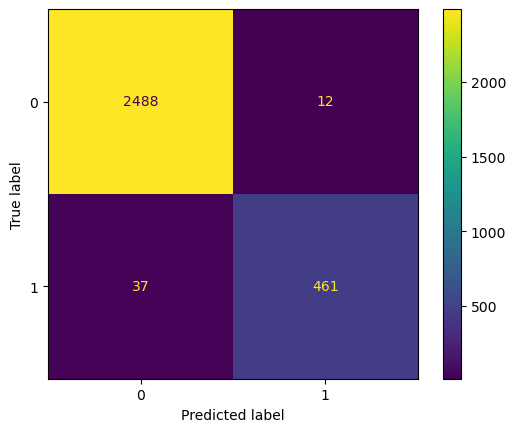

In [96]:
preds = tree1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tree1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree1.classes_)
disp.plot(values_format='');

### Insights

The model predicts lesser false positives than false negatives, which means that some employees may be not be identified as at risk of quitting or getting fired. Despite this, this is still a strong model for our prediction.

To find out which are the most importance factors in determining if an employee leaves, we can find out the feature importance from all the models

### Decision tree feature importance

In [60]:
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
satisfaction_level,0.499364
last_evaluation,0.170101
number_project,0.131668
tenure,0.120610
average_monthly_hours,0.076968
department_technical,0.001004
salary,0.000150
department_support,0.000134


### Random forest feature importance

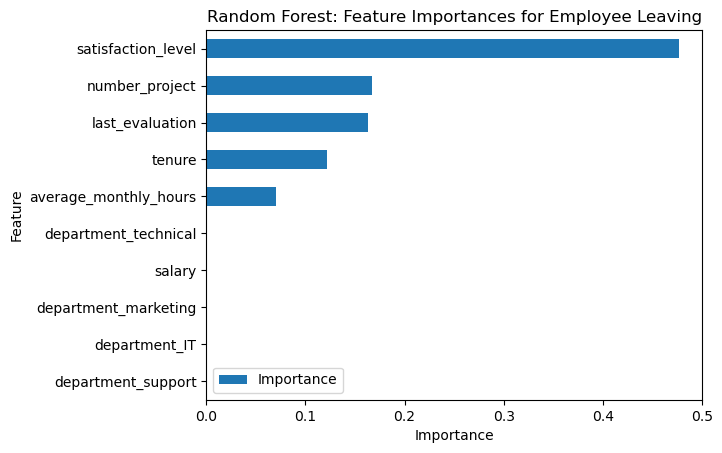

In [98]:
# Get feature importances
feat_impt = rf_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

### XGB feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

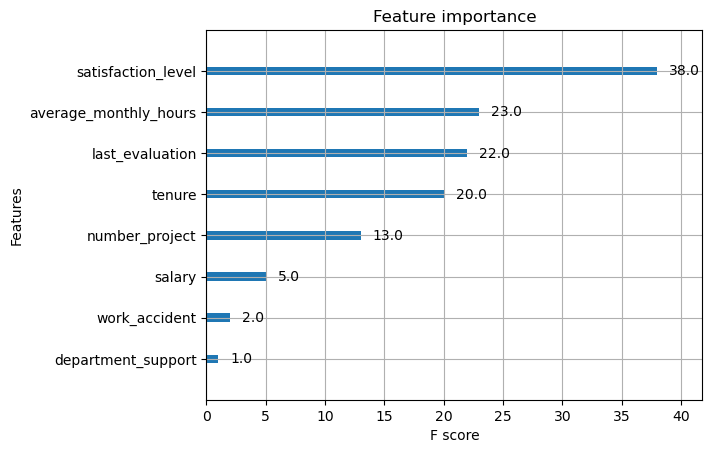

In [99]:
plot_importance(xgb_cv.best_estimator_)

### Logistic Regression feature importance

In [106]:
coefficients = log_clf.coef_

if coefficients.shape[0] > 1:
    importance = np.sum(np.abs(coefficients), axis=0)
else:
    importance = coefficients[0]
    
# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

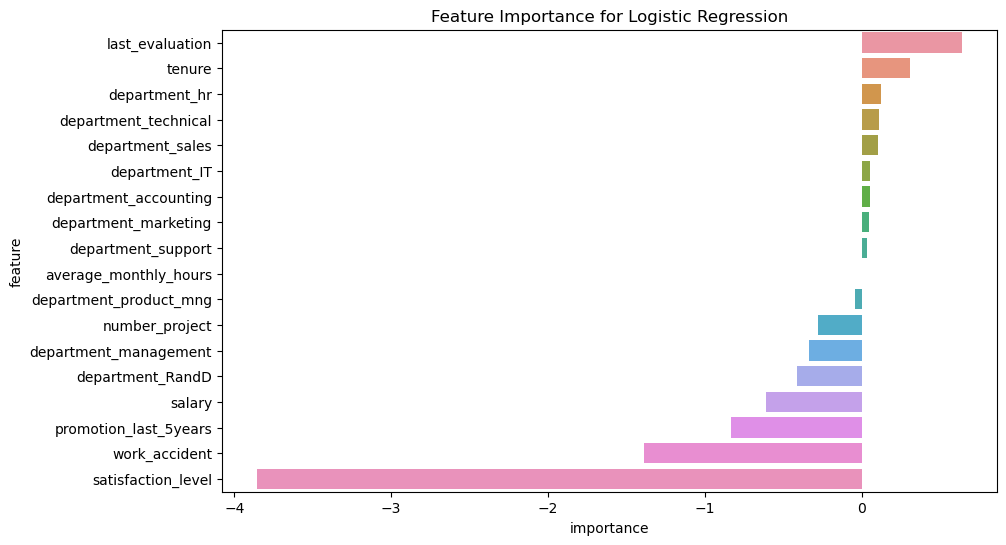

In [107]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Logistic Regression')
plt.show()

### Insights

All the models shows that satisfaction_level, average_monthly_hours,last_evaluation, number_project, and tenure are most helpful in predicting the outcome variable, left.

### Conclusion, Recommendations, Next Steps

The model and the feature importances extracted from the model confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 